<p> </p>
<h3 style="font-size: 1.17em; text-align: center;">ESCUELA DE INGENIERÍA INFORMÁTICA</h3>
<h3 style="font-size: 1.17em; text-align: center;">UNIVERSIDAD DE SEVILLA</h3>
<h4 style="font-size: 1em; text-align: center;"><strong>ÁLGEBRA LINEAL Y NUMÉRICA</strong></h4>
<h3 style="font-size: 1.17em;">Quinta práctica: descomposiciones QR y SVD de una matriz.</h3>
<p>En esta quinta sesión nos marcamos los siguientes objetivos:</p>
<p>- Estudiar la <a href="#QR">descomposición QR</a> de una matriz y aportar algoritmos de cálculo.</p>
<p>- Aplicar la descomposición QR a la <a href="#resolucion">resolución de sistemas lineales</a>, analizando las ventajas.</p>
<p>- Estudiar la <a href="#DVS">descomposición en valores singulares (SVD)</a> de una matriz y  aportar un algoritmo para su cálculo.</p>
<p>- <a href="#aplicar">Aplicar  la SVD</a> al problema del cálculo del rango de una matriz y a la compresión de imágenes digitales.</p>
<p>La práctica finaliza con la realización por parte del alumnado de un <a href="#cuestionario">cuestionario personalizado.</a></p>

<h3><strong><a name="QR"></a></strong></h3>
<h3><strong>Factorización QR de una matriz</strong></h3>
<p><strong>Teorema</strong></p>
<p><em>Dada una matriz $A\in \mathbb{R}^{m \times n}$ de rango $n$, existe una matriz  $Q\in \mathbb{R}^{m \times n}$ y otra $R$ no singular de orden $n$, tales que $A=QR$, donde $Q^tQ=I_n\ $  y $R$ es triangular superior.</em></p>
<p>La <strong>demostración </strong>consiste en  una interpretación matricial de todo el proceso de ortonormalización de Gram-Schmidt aplicado a las columnas $ a_1,a_2,\dots,a_n$ de la matriz $A$. A continuación se proporciona la formulación resultante de dicho proceso.</p>
<p>Si $q_1,q_2,\dots,q_n$ son las columnas de la matriz buscada $Q$, resultado del proceso de ortonormalización de Gram-Schmidt aplicado sobre las columnas de $A$, tenemos las siguientes fórmulas</p>
<p>\begin{align*} \text{Para cualquier } k\in\{1,\ldots,n\},\qquad  y_{k} =& a_{k}-\sum_{i=1}^{k-1} \left\langle q_i,a_{k} \right\rangle q_i, \\  q_k =& \frac{1}{\parallel y_k\parallel_2}. y_k\end{align*}</p>
<p>donde $\left\langle a,b \right\rangle$ representa el producto escalar usual en $\mathbb{R}^m$ y $\parallel a \parallel_2$ es la norma euclídea asociada.</p>
<p>Además, sabemos, cada $y_k$ es ortogonal a todos los vectores precedentes $y_1,\ldots,y_{k-1}$ y, consecuentemente, también es ortogonal a los vectores $a_1,\ldots,a_{k-1}$; esto es $\left\langle y_{k},a_i \right\rangle=0$ para cualquier $i \in \{1,2,\dots k-1\}$.</p>
<p>Denotemos $R=Q^t A$. Tenemos</p>
<p>\begin{align*}R &=Q^t A\\[5mm] &=\left(\begin{array}{c} q_1^t \\ q_2^t\\ \vdots \\ q_n^t\end{array}\right)\left( a_1\ a_2\ \dots \ a_n\right)\\[5mm] & =\left(\begin{array}{cccc} q_1^t a_1 & q_1^t a_2 & \cdots & q_1^t a_n\\ q_2^t a_1 & q_2^t a_2 & \cdots & q_2^t a_n\\ \vdots & \vdots & \ddots & \vdots \\ q_n^t a_1 & q_n^t a_2 & \cdots & q_n^t a_n\end{array}\right)\\[5mm]&=\left(\begin{array}{cccc} \left\langle q_1, a_1\right\rangle  & \left\langle q_1, a_2\right\rangle  & \cdots & \left\langle q_1, a_n\right\rangle \\ \left\langle q_2, a_1\right\rangle  & \left\langle q_2, a_2\right\rangle  & \cdots & \left\langle q_2, a_n\right\rangle \\ \vdots & \vdots & \ddots & \vdots \\ \left\langle q_n, a_1\right\rangle  & \left\langle q_n, a_2\right\rangle  & \cdots & \left\langle q_n,a_n\right\rangle \end{array}\right)\\[5mm]&=\left(\begin{array}{cccc} \left\langle q_1, a_1\right\rangle  & \left\langle q_1, a_2\right\rangle  & \cdots & \left\langle q_1, a_n\right\rangle \\ 0 & \left\langle q_2, a_2\right\rangle  & \cdots & \left\langle q_2, a_n\right\rangle \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \left\langle q_n,a_n\right\rangle \end{array}\right)\end{align*}</p>
<p>De dónde $R$  es una matriz triangular superior (es la matriz $R$ buscada) y cada $r_{ii}=\left\langle q_i,a_i \right\rangle \neq 0$, por lo que $R$ es también una matriz no singular.</p>
<p style="text-align: center;"><span style="color: #0000ff;"><br /></span></p>
<p>La siguiente función proporciona la descomposición $A=QR$, siguiendo el proceso vectorial descrito anteriormente:</p>
<p style="text-align: center;"><span style="color: #0000ff;">Q, R = factorizacion_QR(A)</span></p>
<p> </p>

> Ejecutar las dos celdas que siguen para poder utilizar las funciones que definen.

In [4]:
#auto
def tril(A,k):
    return matrix(A.base_ring(), A.nrows(), A.ncols(), lambda i,j: A[i,j] if j <= i+k else 0)
    
def triu(A):
    L = copy(A).transpose()
    return(tril(L, 0).transpose())
    
def factorizacion_QR(A):
    q = []  # Lista de los vectores qi (columnas de Q)
    for ak in A.columns():
        yk = ak - sum( qi.dot_product(ak) * qi for qi in q )# dot_product es el p.escalar usual
        qk = yk/yk.norm(2)
        q.append(qk)
    Q = matrix(q).transpose()
    R = triu(Q.transpose()*A) # Q.transpose()*A ya es triangular superior, excepto por los redondeos
                              # Aplicar triu elimina los coeficientes muy pequeños debajo de la diag. 
    return Q, R

In [5]:
def forma_escalonada(M, canon = False, ver_transfo = False, algoritmo = 'sin pivotear'):
    A  = copy(M)
    m  = A.nrows() # número de filas
    n  = A.ncols() # número de columnas
    mindim = min(m, n)
    lista_transfos = []                         # Lista que recordará las operaciones realizadas.
    F  = copy(identity_matrix(base_ring(A), m)) 
    s  = 0
    for k in range(mindim):
        (r, s) = busca_pivote[algoritmo](A,  k, s)
        if (r < m) and (s < n):   # Si hemos encontrado un pivote...
            if (r != k):          #    Si el pivote no está en la primera fila considerada...  
                A.swap_rows(k, r) #    ... lo colocamos allí (fila k)
                F.swap_rows(k, r)
                lista_transfos.append( ('swap',(k+1,r+1)) )
            piv = A[k, s]             # Valor del pivote. Su posicion es ahora: fila k, col s.
            ### reduccion debajo del pivote ### 
            for t in range(k + 1, m): # reducimos los coeficientes DEBAJO del pivote.
                multip = A[t, s]*piv^-1 
                if multip != 0:
                    A[t, s] = 0
                    F[t] = F[t] - multip*F[k]
                    lista_transfos.append( ('combination', (t+1, k+1, -multip)))
                    for v in range(s + 1, n):
                        A[t, v] = A[t, v] - multip*A[k, v]
            ### reduccion encima del pivote ###            
            if canon:    
                for t in range(k):   
                    multip = A[t, s]*piv^(-1)
                    if multip != 0:
                        A[t, s] = 0
                        F[t] = F[t] - multip*F[k]
                        lista_transfos.append( ('combination',(t+1, k+1, -multip)))
                        for v in range(s + 1, n):
                            A[t, v] = A[t, v] - multip*A[k, v]
                F[k] = F[k]*piv^(-1)  # reducimos también el pivote a 1.
                A[k] = A[k]*piv^(-1)
                lista_transfos.append( ('rescale', (k+1, piv^(-1))) )
        s = s+1        
    print
    ## Presentación de los resultados
    if ver_transfo: 
        show_operations(M, lista_transfos)
        if canon: print('Forma escalonada canónica:')
        else: print('Forma escalonada simple:')
        show(A)
    return(F, A)    
        
busca_pivote={}

def busca_pivote_sin_pivotear(A, k, s):
    '''Se busca como pivote el primer coeficiente no-nulo, 
    en las filas k y siguientes, columna s y siguientes.'''
    r = k
    (m, n) = A.dimensions()
    while (r < m) and (s < n) and (A[r, s] == 0):
       r = r + 1                    # ... en primer lugar en la misma columna s.
       if r == m: (r, s) = (k, s+1) # pasamos a la columna siguiente
    return(r,s)
    
busca_pivote['sin pivotear'] = busca_pivote_sin_pivotear

def show_operations(M, lista_transfos):
    'Presentacion de las operaciones elementales.'
    print('Matriz original:')
    show(M)
    print
    print('Transformaciones elementales realizadas:')
    for (tipo, parametros) in lista_transfos:
        if tipo == 'swap':
            (indice1, indice2) = parametros
            pretty_print(html('$F_{%s,%s}$'%(latex(indice1), latex(indice2))))
            print
        elif tipo == 'combination':
            (indice1, indice2, factor) = parametros
            pretty_print(html('$F_{%s,%s}(%s)$'%(latex(indice1),latex(indice2), latex(factor))))  
            print
        elif tipo == 'rescale':
            (indice, factor) = parametros
            pretty_print(html('$F_{%s}(%s)$'%(latex(indice), latex(factor))))  
            print
    return None
    
def sustitucion_regresiva(U):
    m = U.ncols()
    n = U.nrows()
    # Se separa la ultima columna: U = ( M | x )
    M = U.submatrix(ncols=m-1) # Las m-1 primeras columnas (se quita la ultima)
    x = U.column(-1)           # La ultima columna.
    for k in range(n - 1, -1, -1):
        x[k] = (x[k] - sum(M[k, j]*x[j] for j in range(k + 1, n)))/M[k, k]
    return x

<h3><span style="color: #0000ff;">Ejemplo 1</span></h3>
<p>Vamos a hallar la factorización $QR$ de una matriz $A$ de orden $4 \times 3$:</p>

In [3]:
A = matrix(RDF, [[1, 2, -1], [3, 4, 0], [-1, 0, 1], [1, 1, 1]])
show(A)

[ 1.0  2.0 -1.0]
[ 3.0  4.0  0.0]
[-1.0  0.0  1.0]
[ 1.0  1.0  1.0]

<p>Comprobamos que el rango coincide con el número de columnas:</p>

In [4]:
A.rank()

3

In [5]:
Q, R = factorizacion_QR(A)
show(Q)
show(R)

[  0.2886751345948129  0.49999999999999967  -0.5883484054145521]
[  0.8660254037844388  0.16666666666666546  0.13074409009212282]
[ -0.2886751345948129   0.8333333333333336  0.45760431532242923]
[  0.2886751345948129 -0.16666666666666696   0.6537204504606136]

[ 3.4641016151377557  4.3301270189221945 -0.2886751345948129]
[                0.0  1.4999999999999942 0.16666666666666696]
[                0.0                 0.0   1.699673171197595]

<p>Comprobamos si la factorización $QR$ es correcta:</p>

In [6]:
Q*R == A  ## trabajando con valores decimales, es difícil obtener una identidad exacta

False

In [7]:
show(Q*R - A)  ## vemos la matriz diferencia entre ambos lados de la igualdad anterior

[ 4.440892098500626e-16 -2.886579864025407e-15 1.1102230246251565e-16]
[1.7763568394002505e-15 -8.881784197001252e-16                    0.0]
[-4.440892098500626e-16 -4.884981308350689e-15                    0.0]
[ 4.440892098500626e-16  8.881784197001252e-16  2.220446049250313e-16]

<p>Obsérvese que las diferencias entre $QR$ y $A$ se deben a pequeños errores de redondeo, del orden de $10^{-16}$ aproximadamente. Existe un método en Sage que, aplicado sobre una matriz $A$, devuelve otra matriz donde se sustituyen  los números próximos a cero por cero, con un nivel de tolerancia determinado, es decir, que si $|a|<tol$ entonces reemplazamos $a=0$. La sintaxis es</p>
<p><span style="font-family: arial,helvetica,sans-serif; color: #0000ff;">A.zero_at(tol)</span></p>
<p>donde tol es el nivel de tolerancia.</p>
<p>Lo aplicamos al resultado anterior, con un nivel de tolerancia tol=$10^{-14}$.</p>

In [8]:
show((Q*R - A).zero_at(10^(-14)) ) # comprobamos que, salvo pequeños errores, QR = A   pues   QR-A = O

[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]

In [9]:
show((Q*R - A).zero_at(10^-16)) # si bajamos el nivel de tolerancia, siguen visibles algunos errores

[ 4.440892098500626e-16 -2.886579864025407e-15 1.1102230246251565e-16]
[1.7763568394002505e-15 -8.881784197001252e-16                    0.0]
[-4.440892098500626e-16 -4.884981308350689e-15                    0.0]
[ 4.440892098500626e-16  8.881784197001252e-16  2.220446049250313e-16]

<p>Otra posibilidad para comprobar cómo de próximos están los valores de las matrices  $QR$ y $A$ es hallar la norma matricial de $QR-A$ para ver si está próxima a cero.</p>

In [10]:
(Q*R - A).norm(2)  ## norma euclídea de la diferencia

5.811753869912703e-15

<p>Comprobamos finalmente si $Q^t Q = I$:</p>

In [11]:
show(Q)

[  0.2886751345948129  0.49999999999999967  -0.5883484054145521]
[  0.8660254037844388  0.16666666666666546  0.13074409009212282]
[ -0.2886751345948129   0.8333333333333336  0.45760431532242923]
[  0.2886751345948129 -0.16666666666666696   0.6537204504606136]

In [12]:
(Q.transpose()*Q - 1).norm(2)

1.4823034685234727e-15

In [13]:
show(Q.transpose()*Q - 1)  # calculamos el valor numérico de   Q^t*Q-I; la matriz identidad aquí se expresa con 1

[  4.440892098500626e-16 -1.2698175844150228e-15   2.220446049250313e-16]
[-1.2698175844150228e-15  -2.220446049250313e-16  -1.942890293094024e-16]
[  2.220446049250313e-16  -1.942890293094024e-16                     0.0]

In [14]:
show((Q.transpose()*Q - 1).zero_at(10^-14))

[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]

<p>Es importante no confundir $Q^tQ=I_n$ con $QQ^t$ pues esta última no tiene porqué verificar $QQ^t=I_m$.</p>

In [15]:
show(Q*Q.transpose())   ### no se obtiene la matriz unidad de orden 4

[   0.6794871794871793    0.2564102564102557   0.06410256410256399  -0.38461538461538475]
[   0.2564102564102557    0.7948717948717948 -0.051282051282052266     0.307692307692308]
[  0.06410256410256399 -0.051282051282052266    0.9871794871794874   0.07692307692307654]
[ -0.38461538461538475     0.307692307692308   0.07692307692307654    0.5384615384615388]

<h3><span style="color: #0000ff;">Ejemplo 2</span></h3>
<p><em>Sea  $H_{15}$ la matriz de Hilbert de orden $15$ (los coeficientes $h_{ij}$ de $H_{n}$ vienen definidos como $h_{ij}= 1/(i+j-1)$) .</em></p>
<p><em>Calcular la descomposición $QR$ para la matriz $H_{15}$ y analizar los errores cometidos.</em></p>

<p>Facilitamos una función que genera la matriz de Hilbert de orden n</p>

In [6]:
def matrizHilbert(n):
    r"""
    Calcula la matriz de Hilbert de orden n.
    Una tal función ya está proporcionada por SAGE8 (matrix.hilbert) 
    pero no por las versiones anteriores.
    """
    return matrix(QQ, n, lambda i, j: 1/(i+j+1) )
    # 1/(i+j+1) en vez de 1/(i+j-1) ya que i,j empiezan a 0

In [17]:
A = matrizHilbert(15).n()

In [18]:
Q, R = factorizacion_QR(A)

In [19]:
(Q*R - A).norm(2)

0.00031997644119073474

In [20]:
(Q.transpose()*Q - 1).norm(2)

7.996252222451787

<p>En este ejemplo, los errores numéricos son considerablemente grandes. En consecuencia, tal descomposición obtenida no puede utilizarse en cálculos prácticos poque no tendrían validez o fiabilidad.</p>
<p>Podemos intentar identificar las matrices que tienen un mal comportamiento numérico con ayuda del estudio del <span style="background-color: #ffffff; color: #ff0000;"><em>número de condición</em></span> de tales matrices. El número de condición de una matriz $A$, que notaremos <span style="color: #ff0000;">$\kappa(A)$</span>, estima cuánto se amplifican como máximo los errores relativos sobre los datos cuando resolvemos sistemas $Ax=b$ (es decir, sistemas con matriz de coeficientes igual a $A$, cuadrada y no singular).</p>
<p>La siguiente función proporciona el número de condición de una matriz $A$ regular, para la norma especificada:</p>
<p style="text-align: center;"><span style="color: #0000ff;">numero_condicion(A, p)</span></p>
<p>donde</p>
<ul>
<li>p=1 se refiere a la norma-1,</li>
<li>p=2 para la norma euclídea (valor por defecto).</li>
<li>y p=Infinity para la  norma infinito.</li>
</ul>
<p>Si la matriz es singular o se utiliza otra norma diferente, se imprime un mensaje de error.</p>

In [7]:
def numero_condicion(A, p = 2):
    try:
        B = A.inverse() 
        cond = 0
        if p == 2: 
            cond = A.norm(2)*B.norm(2) 
        if p == 1: 
            cond = A.norm(1)*B.norm(1) 
        if p == Infinity: 
            cond = A.norm(Infinity)*B.norm(Infinity) 
    except ZeroDivisionError:
        print(' Error: la matriz ha de ser cuadrada y no singular.')
    if cond == 0:
        print(' Error: sólo se contemplan las normas p=1, p=2, p=Infinity.')
    return cond

In [22]:
numero_condicion(A)

4.197819332639827e+17

<p>Observamos que la matriz de Hilbert de orden 15 tiene un número de condición superior a $4\cdot 10^{17}$, de ahí su mal comportamiento en los cálculos numéricos de su descomposición QR.</p>
<p>Las matrices de Hilbert son conocidas en la literatura matemática por tratarse de ejemplos de matrices muy mal condicionadas para realizar cálculos numéricos con ellas.</p>
<p>En vista de los resultados obtenidos anteriormente, el método de descomposición $QR$ por ortonormalización de Gram-Schmidt puede amplificar errores para matrices mal condicionadas, obteniéndose que la matriz $Q$ de la descomposición no es ortogonal, lo que invalida dicha descomposición. En consecuencia habría que introducir algún refinamiento o método alternativo para abordar este tipo de descomposición, que tuviera en cuenta el condicionamiento de las matrices. Estudiaremos otras formas alternativas de descomposiciones $QR$, tales como descomposición de Givens y descomposición de Householder, en un próximo tema.</p>

<h3><strong><a name="resolucion"></a></strong></h3>
<h3><strong>Aplicación de la descomposición $QR$ a la resolución de sistemas lineales</strong></h3>
<p>Dado un  sistema lineal  $Ax=b$, si la matriz $A$ <strong>cuadrada</strong> admite descomposición $A=QR$ donde $Q$ es una <strong>matriz ortogonal</strong> ($Q^t=Q^{-1}$ ) y $R$ es una matriz triangular superior, podemos hacer la siguiente transformación:</p>
<p>\begin{align*}Ax=b&\Leftrightarrow QRx=b\\ &\Leftrightarrow Rx=Q^t b\end{align*}</p>
<p>de donde resulta un sistema lineal equivalente con matriz de coeficientes triangular. El coste computacional para resolver dicho sistema es de orden $n^2$, siendo $n$ el orden de la matriz $A$, sin embargo, el coste computacional de la descomposición $QR$ a partir del método de Gram-Schmidt es superior a cualquier método de escalonamiento del sistema original de los ya estudiados.</p>
<p>¿Dónde radica el interés?</p>
<p>En el condicionamiento de los sistemas resultantes. Sabemos que, para la norma euclídea (o "norma espectral") de las matrices, el número de condición de una matriz es 1 (el mínimo posible) si y solo si dicha matriz es ortogonal y además $\kappa(A)=\kappa(QR)=\kappa(R)$ por ser $Q$ matriz ortogonal. En conclusión, los sistemas $Ax=b$ y $Rx=Q^tb$ están igualmente condicionados.</p>
<p>Esto no sucede con los métodos de escalonamiento, donde la matriz $A$ admite una descomposición del tipo $PA=LU$ siendo $P$ una matriz de permutación (y por tanto ortogonal), $L$ una matriz triangular inferior unitaria y $U$ una matriz triangular superior. En tales casos resulta $\kappa(PA)=\kappa(A)=\kappa(LU)\leq\kappa(L)\kappa(U)$. Al resolverse el sistema lineal $Ax=b$ en tres etapas:</p>
1. $b'=Pb$,
2. $Lg=b'$, 
3. $Ux=g$.
<p>los errores de una etapa se transmiten a la siguiente, pudiendo amplificarse hasta el límite marcado por el número de condición de la matriz de cada etapa. Así, en general, $\kappa(A)$ es bastante menor que $\kappa(L)\kappa(U)$ con lo que corremos el riesgo, al escalonar, que la solución final esté afectada de mayores errores que utilizando el método de descomposición $QR$.</p>

<h3><span style="color: #0000ff;">Ejemplo 3</span></h3>
<p><em>a) Generar una matriz aleatoria $A$ cuadrada de orden 20.</em></p>
<p><em>b) Comprobar  que el número de condición, para la norma euclídea, en la descomposición $QR=A$ es el mismo para las matrices $A$ y $R$ y que, además, como $Q$ es una matriz ortogonal, tiene $\kappa_2(Q)=1$.</em></p>
<p><em>c) Comprobar que para la descomposición $PA=LU$ estudiada en temas anteriores, sucede que $\kappa(A)$ es bastante menor que $\kappa(L)\kappa(U)$.</em></p>
<p><em>d) Repetir el proceso tomando como A la matriz de Hilbert de orden 20. Comparar las soluciones que se obtiene del sistema cuya solución es el vector $(1,\ldots ,1)^T$ según los métodos descritos en los apartados b) y c).</em></p>
<p><em><strong>Observación:</strong> Para los apartados c y d, se redefine aquí la función </em>descompPLU<em> de la Práctica 2 y los procedimientos auxiliares modifica_lado_derecho y sustitucion_regresiva2.</em></p>

In [8]:
def descompPLU(M):
    r'Descomposicion PlU de A. Se tiene PA=LU.'
    A = copy(M)
    m = A.nrows(); n = A.ncols()
    piv = list(range(n))
    for k in range(m):
        (vmax, q) = max(  (abs(A[s, k]), s) for s in range(k, m) )
        if q != k:
            piv[k], piv[q] = piv[q], piv[k]
            A.swap_rows(q, k)
        if A[k, k] != 0:
            for t in range(k + 1, m):
                A[t, k]    = A[t, k]/A[k, k]
                A[t, k+1:] = A[t, k+1:] - A[t, k]*A[k, k+1:]
    L = identity_matrix(base_ring(A), m) + tril(A, -1)
    U = triu(A)
    P = identity_matrix(base_ring(A), m).matrix_from_rows(piv)
    return P, L, U
            
def modifica_lado_derecho(L, b):
    r'''
    
    '''
    g = copy(b)
    n = len(b)
    for k in range(n - 1):
        for j in range(k + 1, n):
            g[j] = g[j] - g[k]*L[j, k]
    return g    


            
def sustitucion_regresiva2(U, g):
    r'''
    Resuelve Ux=g, con U triangular superior, por sustitucion regresiva.
    '''
    n = U.ncols()
    x = copy(g)
    for k in range(n - 1, -1, -1):
        x[k] = (g[k] - sum(U[k, j]*x[j] for j in range(k + 1, n)))/U[k, k]
    return x

In [24]:
A = random_matrix(RDF, 20)  # generamos una matriz aleatoria de orden 20 
                            # con coeficientes en el intervalo (-1,1)

In [25]:
Q, R = factorizacion_QR(A)

In [26]:
cond_A, cond_R = numero_condicion(A), numero_condicion(R)
print(cond_A)
print(cond_R)

47.87928279898998
47.879282798989856


In [27]:
numero_condicion(Q)

1.0000000000000036

In [28]:
P, L, U = descompPLU(A)  # hallamos la descomposición PLU de la matriz A

In [29]:
cond_A, cond_U, cond_L = numero_condicion(A), numero_condicion(U), numero_condicion(L)
print(cond_A)
print(cond_U)
print(cond_L)

47.87928279898998
65.00599695193851
17.744374749840492


In [30]:
cond_U * cond_L

1153.490770902186

In [31]:
cond_U * cond_L / cond_A  ### calculamos en qué proporción puede ser peor un resultado que otro

14.03858493486804

<p>Luego los errores de transmisión en la descomposición $PA=LU$ podrían llegar a ser bastante mayores que en la descomposición $A=QR$.</p>
<p>Probamos ahora con la matriz de Hilbert de orden 20:</p>

In [31]:
A = matrizHilbert(20)

<p>Primero generamos la solución de  $Ax=b$ tomando como vector solución $x_0=(1,1,\dots, 1)$ y como vector de términos independientes $b=Ax_0$. De esta forma podemos controlar los errores de cálculo numérico que resulten.</p>

In [32]:
x0 = vector(QQ, [1]*20)  # esta es la solución exacta x0=(1,1,....,1)
b  = A*x0

A*x0 == b

True

<p>Ahora pasamos tanto la matriz $A$ como el vector $b$ a valores decimales en el anillo RDF:</p>

In [33]:
A = A.change_ring(RDF)
b = vector(RDF, list(b))

In [34]:
A*x0 == b   ### al pasar a valores decimales, x0 ha dejado de ser la solución exacta

False

In [35]:
(A*x0 - b).norm()   ### el error residual es muy pequeño

8.671119018262734e-16

<p>Ahora hallamos la solución aportada mediante escalonamiento directo del sistema:</p>

In [36]:
M = block_matrix([[A, b.column()]])        ### matriz ampliada del sistema
F, U = forma_escalonada(M)                 ### escalonamiento de la matriz
xd = sustitucion_regresiva(U)              ### solución por sustitución regresiva
xd

(1.000000124226477, 0.9999796755284203, 1.0008244799317345, 0.9855194857487556, 1.1365871296462322, 0.2313994092835615, 3.7153571964135423, -5.115792992417402, 9.694637349911602, -7.030204680429338, 8.615582812887048, -12.276898850221569, 20.760586096148497, -13.261390805736797, -2.1988590931521714, 19.541494241608962, -20.704358420716225, 15.62232969107717, -4.703545047394849, 1.986752247745273)

<p>Ahora, la solución mediante descomposición $PA = LU$:</p>

In [37]:
P, L, U = descompPLU(A)
bp = P*b                                       # obtenemos el vector P*b
g    = modifica_lado_derecho(L,bp)             # g es la solución del sistema auxiliar Lg=Pb
xplu = sustitucion_regresiva2(U, g)            # xplu es la solución final del sistema Ux=g
xplu

(1.0000000086426724, 0.9999986657161956, 1.000051870354066, 0.9991154891259608, 1.0081538624512598, 0.9554259795063353, 1.1480447591128848, 0.7179174753630226, 1.2219909210581241, 1.1349811979685378, 0.9046499198959809, -0.1506153244366207, 3.2583719348362883, 0.5724925380487212, -2.78859172959099, 7.021744897670579, -3.3827258983473394, 2.625929343329312, 0.7555313550930265, 0.9975327354788517)

<p>Finalmente, mediante descomposición $A=QR$ obtenida por el método de Gram-Schmidt:</p>

In [38]:
Q, R = factorizacion_QR(A)
bq = Q.transpose()*b                   ### obtenemos el vector Q^t*b
xqr = sustitucion_regresiva2(R,bq)     ### xqr es la solución del sistema Ax=b 
                                       ### mediante descomposicion QR
xqr

(0.8639999562240867, 6.018869270821345, -44.006551600550765, 161.75173964201045, -258.81763207602336, 179.26238773673535, -31.18507816656844, -0.13740106983900408, -0.024896980678297955, -0.007911399589380218, -0.003350256911802129, -0.001693401105151087, -0.0009651329934336842, -0.0005996529240060421, -0.00039761880975771436, -0.0002773012323048984, -0.00020135710218152547, -0.000151082049442507, -0.00011648243490877969, 6.361184332914029)

<p>Comparamos la norma del error absoluto obtenido por cada método:</p>

In [39]:
print((xd - x0).norm())     ## método directo de escalonamiento
print((xplu - x0).norm())   ## método descomposicion PLU
print((xqr - x0).norm())    ## método descomposicion QR

45.67300403263424
8.905818207115125
358.12232114681


In [40]:
print((A*x0 - b).norm())     ## error residual de la solución exacta x0
print((A*xd - b).norm())     ## error residual de la solución mediante escalonamiento
print((A*xplu - b).norm())   ## error residual mediante PLU
print((A*xqr - b).norm())    ## error residual mediante QR

8.671119018262734e-16
1.7867348644430382e-15
7.611305586242616e-16
1.4316566172596348e-05


<p>La solución más próxima a la realidad, pese al mal condicionamiento, se obtiene mediante la descomposición $PLU$, seguida del escalonamiento directo y, finalmente, los peores resultados se obtienen para la factorización QR de la matriz.</p>
<p>Es una conclusión errónea pensar que este tipo de ejemplos invalida el uso de la descomposición $QR$ como método de resolución de sistemas de ecuaciones. La conclusión es que el método de Gram-Schmidt como procedimiento para obtener una descomposición de tipo $A=QR$ está muy mal condicionado. En un próximo tema veremos técnicas de descomposición $QR$ más sofisticadas y que funcionan bastante mejor para sistemas mal condicionados que las técnicas basadas en escalonamiento; concretamente, estudiaremos factorizaciones  $A=QR$ mediante transformaciones de Householder y mediante rotaciones de Givens.</p>

<h3><span style="color: #0000ff;">Ejemplo 4</span></h3>
<p><em>Resolver el sistema lineal $Ax=b$ mediante la descomposición $A=QR$, para </em></p>
<p>$$\left(\begin{array}{ccc}1 & 2 & -1\\ 3 & 4 & 0\\ -1 & 0 & 1\end{array}\right),\ \ b=\left(\begin{array}{c}2\\ -1\\ 3\end{array}\right)$$</p>

In [41]:
A = matrix(RDF, [[1, 2, -1], [3, 4, 0], [-1, 0, 1]])
b = vector(RDF, [2, -1, 3]);
show(A)
show(b)

[ 1.0  2.0 -1.0]
[ 3.0  4.0  0.0]
[-1.0  0.0  1.0]

(2.0, -1.0, 3.0)

In [42]:
Q, R = factorizacion_QR(A)
show(Q)
show(R)

[ 0.30151134457776363   0.4923659639173309  -0.8164965809277261]
[  0.9045340337332909  0.12309149097933261   0.4082482904638632]
[-0.30151134457776363   0.8616404368553291   0.4082482904638631]

[ 3.3166247903554003   4.221158824088691 -0.6030226891555273]
[                0.0  1.4770978917519924  0.3692744729379982]
[                0.0                 0.0  1.2247448713915892]

In [43]:
bq = Q.transpose()*b; show(bq)

(-1.2060453783110545, 3.4465617474213164, -0.8164965809277263)

In [45]:
sustitucion_regresiva2(R, bq)

(-3.666666666666667, 2.500000000000001, -0.6666666666666667)

<p>Comparamos con la solución obtenida mediante  solve_right:</p>

In [46]:
A.solve_right(b)

(-3.6666666666666674, 2.5000000000000004, -0.6666666666666669)

<h3><a name="DVS"></a></h3>
<h3>Descomposición en valores singulares (SVD) de una matriz</h3>
<p><strong>Teorema (Descomposición en valores singulares)</strong></p>
<p>Toda matriz real $A$, de orden $m\times n$ puede ser factorizada de la forma $A=U\Sigma V^t$ donde</p>
<ul>
<li>$U$ es una matriz ortogonal $m\times m$,</li>
<li>$\Sigma$ es una matriz diagonal $m\times n$</li>
<li>$V$ es una matriz ortogonal de orden $n\times n$.</li>
</ul>
<p><strong>Idea constructiva de demostración:</strong></p>
<p>La matriz $A^tA$ es simétrica de orden $n\times n$ y semidefinida positiva.</p>
<p>Resulta, por ello, que sus autovalores son reales no negativos $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$. Las raíces cuadradas de los autovalores, $\sigma_i = \sqrt{\lambda_i}$, son los <strong>valores singulares</strong> de la matriz $A$. Sea $r$ el número de valores singulares no-nulos. Entonces $r$ es el rango de $A$, y tenemos:</p>
<p>$$\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r >0, \quad \sigma_{r+1}=\sigma_{r+2}= \cdots = \sigma_n=0.$$</p>
<p> </p>
<p>Sea $\{v_1,v_2,\ldots,v_n\}$ un conjunto ortonormal de autovectores de $A^tA$, dispuestos de forma que</p>
<p>$$A^tAv_i=\sigma_i^2v_i$$</p>
<p>Se verifica entonces que</p>
<p>$$\|Av_i\|^2_2=v_i^tA^tAv_i=v_i^t\sigma_i^2v_i=\sigma_i^2$$</p>
<p>Construimos la matriz $V$ de orden $n\times n$ cuyas columnas son $v_1,v_2,\ldots,v_n$ y definimos</p>
<p>$$u_i=\sigma_i^{-1}Av_i\ \  1\leq i\leq r$$</p>
<p>Los vectores $u_i$, con $i\le r$, constituyen un sistema ortonormal.</p>
<p>Elegimos vectores adicionales $u_{r+1},u_{r+2},\ldots,u_m$ de tal forma que $\{u_1,\ldots,u_m\}$ constituya una base ortonormal de $\mathbb{R}^m$ y construimos la matriz $U$ de orden $m\times m$ cuyas columnas son los vectores $u_i$. Por otra parte,  la matriz $\Sigma$ de orden $m\times n$ es una matriz diagonal cuyos elementos diagonales $\Sigma_{ii}=\sigma_i\ $ para $1\leq i\leq r$  y los restantes elementos nulos. Finalmente se tiene que</p>
<p>$$A=U\Sigma V^t$$</p>
<p>$$ A=U \Sigma V^t = (u_1\ u_2\dots\ u_m) \left(\begin{array}{cccccc} \sigma_1 &  &  & & &  \\ & \ddots &  & & &  \\  &  &\sigma_r &  & & \\  & & & 0 & &\\  & & & & \ddots & \\  & & & & & 0\end{array}\right) \left(\begin{array}{c}v_1^t\\ v_2^t\\ \vdots \\ v_n^t\end{array}\right)$$</p>
<p>Una forma especialmente interesante de expresar la descomposición anterior es la siguiente:</p>
<p>$$A=U\Sigma V^t=\sigma_1u_1v_1^t+\sigma_2u_2v_2^t+\dots+\sigma_ru_rv_r^t+0+\dots+0$$</p>
<p>que expresa a la matriz $A$, de rango $r$, como suma de $r$ matrices, cada una de ellas de rango 1.</p>
<div style="color: #000000; background-image: initial; background-attachment: initial; background-origin: initial; background-clip: initial; background-color: #ffffff; background-position: initial initial; background-repeat: initial initial; margin: 8px;">
<p>Podemos calcular la descomposición en valores singulares de una matriz $A$ con la instrucción:</p>
<p style="text-align: center;"><span style="color: #0000ff;">U, D, V =A.SVD()</span></p>
<p style="text-align: left;"><span style="background-color: #ffffff;"><span style="color: #000000;">resultando $A=UDV^t$. Es necesario, para usar la instrucción anterior, que la matriz $A$ esté definida en el anillo de números RDF.<br /></span></span></p>
</div>

<h3><span style="color: #0000ff;">Ejemplo 5</span></h3>
<p>Hallar la descomposición en valores singulares de la siguiente matriz $A$. </p>

In [47]:
A = matrix(RDF, [[1, 2, -1], [3, 4, 0], [-1, 0, 1]])  ### hemos usado el tipo RDF
show(A)

[ 1.0  2.0 -1.0]
[ 3.0  4.0  0.0]
[-1.0  0.0  1.0]

In [48]:
U, D, V = A.SVD()
show(D)
show(U)
show(V)

[ 5.520839421931228                0.0                0.0]
[               0.0 1.3776994213725522                0.0]
[               0.0                0.0  0.788844966770898]

[ -0.4151229007686267  0.42688677935578045   0.8033932131084324]
[ -0.9012628450527317 -0.31341613739142543 -0.29915816711247517]
[ 0.12408973118230823  -0.8482558590625172   0.5148434093792152]

[-0.5874108843351766 0.24308221448650816 -0.7719193545733267]
[-0.8033736978708719  -0.290259968648128  0.5199421623312244]
[0.09766859543295936 -0.9255593917197985 -0.3657877224093639]

<p>Compobamos la relación <span style="background-color: #ffffff;"><span style="color: #000000;"> $A=UDV^t$ </span></span> y si las matrices $U$ y $V$ son ortogonales.</p>

In [49]:
U*D*V.transpose() == A  ### nunca se da la igualdad exacta debido a errores numéricos

False

In [50]:
show((U*D*V.transpose() - A).zero_at(10^-15))   ### la igualdad se tiene para un nivel de tolerancia adecuado

[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]

In [51]:
show(U.transpose()*U - 1) # comprobamos que U es ortogonal.

[ 8.881784197001252e-16 -6.938893903907228e-17  -9.71445146547012e-17]
[-6.938893903907228e-17  8.881784197001252e-16 -5.551115123125783e-17]
[ -9.71445146547012e-17 -5.551115123125783e-17  8.881784197001252e-16]

In [52]:
show((U.transpose()*U - 1).zero_at(10^-15))

[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]

In [53]:
show(V.transpose()*V - 1) # comprobamos que V es ortogonal.

[  2.220446049250313e-16    9.71445146547012e-17 -2.7755575615628914e-17]
[   9.71445146547012e-17   4.440892098500626e-16                     0.0]
[-2.7755575615628914e-17                     0.0   4.440892098500626e-16]

In [54]:
show((V.transpose()*V - 1).zero_at(10^-15))

[0.0 0.0 0.0]
[0.0 0.0 0.0]
[0.0 0.0 0.0]

<h3><a name="aplicar"></a></h3>
<h3>Aplicación de la SVD al cálculo del rango de una matriz</h3>
<p>De la expresión $A=U\Sigma V^t$ y, puesto que $U$ y $V$ son matrices ortogonales (no singulares) se deduce que </p>
<p>$$\operatorname{rango}(A)=\operatorname{rango}(\Sigma)=r$$</p>
<p>siendo $r$ el número de valores singulares no nulos. Podría pensarse que para calcular el rango de una matriz $A$ nada mejor que escalonarla mediante transformaciones elementales y contar el número de pivotes, no obstante, los errores de redondeo y de transmisión durante todo el proceso podrían dar lugar a que filas que sean proporcionales (que se anularían durante el escalonamiento) no lo hagan debido precisamente a esos errores, con lo que el valor final del rango sería erróneo. El siguiente teorema (debido a <a href="https://es.wikipedia.org/wiki/Hermann_Weyl">Hermann Weyl</a>) proporciona una interesante cota.</p>
<p><strong>Teorema</strong></p>
<p><em>Sea $A$ una matriz que pretendemos estudiar. Sea $A'$ una aproximación de $A$,  y sean <em>$\sigma_1 \geq \sigma_2 \geq \cdots$ los valores singulares de $A'$.</em></em> <em></em></p>
<p><em>Si $A$ tiene rango $r$, entonces </em></p>
<p><em>$$\parallel A-A'\parallel_2\ge \sigma_{r+1}.$$</em></p>
<p>En conclusión, si el valor de $\sigma_{r+1}$ es muy elevado, se plantean dos posibilidades:</p>
<ul>
<li>o bien el error cometido al aproximar $A$ por $A'$  es grande también,</li>
<li>o bien el rango de $A$ es mayor que $r$.</li>
</ul>
<p>De esta forma podemos elegir como rango de la matriz $A$ el menor $r$ tal que $\sigma_{r+1}$ (el $(r+1)$-ésimo valor singular de una buena aproximación $A'$) tenga un valor despreciable, muy próximo a cero. Al resultado de determinar el rango de esta forma se le  denomina  <span style="color: #ff0000;"><em>rango numérico</em></span> de la matriz $A$.</p>

<div style="color: #000000; background-image: initial; background-attachment: initial; background-origin: initial; background-clip: initial; background-color: #ffffff; background-position: initial initial; background-repeat: initial initial; margin: 8px;">
<p>La siguiente función calcula el<strong style="font-weight: bold;"> rango numérico de una matriz </strong>a partir de su descomposición en valores singulares, con un nivel de tolerancia $\delta$, dado, esto es  $\sigma_{r+1}\leq \delta$</p>
<p style="text-align: center;"><span style="color: #0000ff;">rango_SVD(A, tol)</span></p>
<p style="text-align: left;">el parámetro tol es opcional y su valor por defecto es tol$=10^{-14}$</p>
</div>

In [9]:
def rango_SVD(A, tol = 10^(-14)):
    U, D, V = A.SVD()
    return len([s for s in D.diagonal() if s > tol])

<h3><span style="color: #0000ff;">Ejemplo 6</span></h3>
<p><em>Generar una matriz  aleatoria A, cuadrada y de orden 10. Modificar dos filas mediante las siguientes transformaciones:</em></p>
<div id="_mcePaste" style="position: absolute; left: -10000px; top: 16px; width: 1px; height: 1px; overflow-x: hidden; overflow-y: hidden;"><em>A[3]=0.1*A[7]-4.2*A[5]</em></div>
<div id="_mcePaste" style="position: absolute; left: -10000px; top: 16px; width: 1px; height: 1px; overflow-x: hidden; overflow-y: hidden;"><em>A[4]=-0.1*A[9]+4.2*A[2]</em></div>
<p><em>A[3]=0.1*A[7]-4.2*A[5]</em></p>
<p><em>A[4]=-0.2*A[9]+3.7*A[2]</em></p>
<p><em>Obviamente como la matriz $A$ tiene al menos dos filas combinaciones lineales de otras, su determinante debe ser nulo y su rango menor o igual a 8.</em></p>
<p><em>a) Hacer las comprobaciones oportunas mediante las ordenes  <strong>A.det()</strong> (que nos proporciona el determinante) y <strong>A.echelon_form()</strong> (que nos devuelve la forma escalonada canónica)  para ver el rango de A. ¿Qué sucede?</em></p>
<p><em>b) Deducir el rango de A  a partir de la descomposición SVD de la matriz.</em></p>
<p><em>c) Utilizar la instrucción <span style="color: #0000ff;">rango_SVD(A)</span> para comprobar el resultado.</em></p>

In [56]:
A = random_matrix(RDF, 10)
A[3] = 0.1*A[7] - 4.2*A[5]  # cambiamos la fila 4 por una combinación lineal de las filas 6 y 8
A[4] = -0.2*A[9] + 3.7*A[2] # cambiamos la fila 5 por una combinación lineal de las filas 3 y 10

In [57]:
A.det()   ### el determinante no es idéntico a cero

1.623233604041052e-30

In [58]:
F, U = forma_escalonada(A)   ### nuestro algoritmo de escalonamiento devuelve 10 pivotes, por lo que el rango sería 10
show(U)

[     0.9111370257412943      0.5757247410296051     0.22319645654956943     -0.2569740758680208     -0.6959913620178733     0.49832459816060415      0.8320032974445524      0.5378409289439559      0.7069511604436582    -0.15161138068093805]
[                    0.0     -0.3874048751375523    -0.23276763593177063    0.033206229583802316     -0.6900268602583817     0.45433038167508577       0.353888338482953    -0.09122721974948911    -0.05071457563618542    -0.34332044104691145]
[                    0.0                     0.0      0.4821771211396302      0.9027846407502423       2.284844089459523     -2.1634395786139793     -1.1161806975293316     -0.6226785545847575       0.301045729124824      1.7116297238048515]
[                    0.0                     0.0                     0.0       2.849112992032051       4.428040484156421      -3.864342963443451       5.151436940400483      1.5403270643223907        4.12151338321848      1.0560247314175664]
[                    0.0                     0.0                     0.0                     0.0    -0.29783231082504336    -0.04176063403201906    -0.11655508168943071    0.037891863621306456     -0.0860915360652567     0.10882582354002714]
[                    0.0                     0.0                     0.0                     0.0                     0.0     0.04481638772608135      0.1255600422589461     0.03643165589752096    0.029721952573912445     -0.0826365537341912]
[                    0.0                     0.0                     0.0                     0.0                     0.0                     0.0       7.333718971311054       1.760576558814458       3.403315590972733     -2.2233980403688913]
[                    0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0 -1.1563965789728588e-14   3.488878672082447e-15  -9.826356596347796e-16]
[                    0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0     -0.8601953393080141     -0.4135674188820746]
[                    0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0                     0.0  -4.730670898859417e-15]

In [60]:
UU = A.echelon_form()  # calculamos la forma canónica escalonada implementada en SageMath
show(UU.zero_at(10^-14))

[0.9999999999999999                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0 0.9999999999999999                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0]

In [61]:
UU.diagonal()

[0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

<p>Se han obtenido 10 pivotes, por lo que el rango sería 10. Lo comprobamos con la función rank()  que también proporciona el rango siguiendo el método de escalonamiento:</p>

In [62]:
A.rank()

10

<p>Ahora estudiamos el rango numérico a partir de la descomposición SVD:</p>

In [63]:
U, D, V = A.SVD()

In [64]:
D.diagonal()  # mostramos los valores singulares ordenados de mayor a menor

[7.306895822383303,
 7.02647541668554,
 3.1260579985780073,
 2.0254006192689515,
 1.1281312892711948,
 0.9531378125309682,
 0.761553782285831,
 0.5094587639223316,
 5.20738310239742e-16,
 2.7437563747106303e-16]

<p>Obsérvese que los dos últimos valores singulares son muy pequeños, con lo que el rango estimado de la matriz es 10 - 2 = 8. Lo comprobamos con la función rango_SVD:</p>

In [65]:
rango_SVD(A)

8

<h3><strong>Una aplicación de la descomposición SVD a la compresión de imágenes </strong></h3>
<p>Vamos a analizar una sencilla, y rudimentaria, aplicación de la descomposición SVD de una matriz al problema de <strong>compresión de imágenes (con pérdida de calidad)</strong>.</p>
<p>Una fotografía digital en blanco y negro a resolución $m\times n$ píxeles se puede interpretar matemáticamente como una matriz de dimensión $m\times n$ cuyos elementos, que están en el intervalo $[0,1]$, indican la tonalidad de gris de un pixel de la pantalla del ordenador, en una gama de grises que va desde el negro (0) hasta el blanco (1). Sea $A=(a_{ij})$ la matriz asociada a una fotografía en blanco y negro de dimensión $m\times n$. Aproximaremos $A$ por matrices $A_1$, $A_2$, $A_3$, $\ldots$, $A_k \ldots$ que pueden almacenarse en menos espacio de memoria.</p>
<p>Sean $\sigma_1 \le \cdots \le  \sigma_r$ los valores singulares no nulos de $A$ ordenados de mayor  a menor. Así, se tiene que existen matrices ortogonales $U$ y $V$ tales que</p>
<p>$$ A=U \Sigma V^t = U \left(\begin{array}{cccccc} \sigma_1 &  &  & & &  \\ & \ddots &  & & &  \\  &  &\sigma_r &  & & \\  & & & 0 & &\\  & & & & \ddots & \\  & & & & & 0\end{array}\right) V^t$$</p>
<p>Para cualquier $k \le r$, ponemos $$\Sigma_k =\left(\begin{array}{cccccc} \sigma_1 &  &  & & &  \\ & \ddots &  & & &  \\  &  &\sigma_k &  & & \\  & & & 0 & &\\ & & & & \ddots & \\  & & & & & 0\end{array}\right)$$</p>
<p>y $A_k = U \Sigma_k V^t$.</p>
<p>Ahora bien, cómo son no nulos los k primeros valores de la matriz $\Sigma_k$, basta multiplicar las k primeras columnas de $U$ y las k primeras filas de $V^t$ o, equivalentemente, las k primeras columnas de $V$. De esta forma, la cantidad de datos para construir $A_k$ se reduce a $k(m+n+1)$, frente a los $m\times n$ datos de la matriz $A$. Así, conseguimos un factor de compresión (en tanto por uno) de</p>
<p>$$\frac{k(m+n+1)}{mn}$$</p>
<p>Podemos experimentar con diferentes  valores de $k$, buscando que la imagen de la fotografía $A_k$ sea visualmente equivalente a la de $A$, hasta encontrar un equilibrio adecuado entre el mayor factor de compresión posible y la calidad visual resultante. Si se trata de obtener una compresión de la imagen, no tiene sentido tomar $k$ mayor que la mitad del número de filas o  columnas de la imagen pues, de hacerlo, el número de datos no disminuiría respecto de la  matriz original.</p>

<h3><span style="color: #0000ff;">Ejemplo 7</span></h3>
<p>El siguiente bloque de instrucciones genera una matriz $A$ que representa una imagen digital en blanco y negro a partir de un fichero denominado Lena256.png, que está guardado en un directorio especificado en la variable global DATA.</p>

In [66]:
nombre_fichero = 'Lena256.png'  ######   el nombre del fichero debe ir entre comillas


###### no hay que modificar este codigo, el cual almacena en la matriz A los datos de la imagen elegida.

import pylab 
imagen      = pylab.imread(nombre_fichero)
imagenmedia = pylab.mean(imagen, 2)
A           = matrix(imagenmedia)
m = A.nrows(); n = A.ncols()
print('matriz de orden:',m,'x',n)

matriz de orden: 256 x 256


<p>Podemos visualizar la imagen mediante la siguiente instrucción:</p>

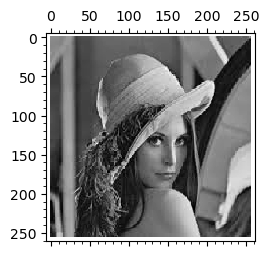

In [67]:
show(matrix_plot(A, figsize = 4, cmap = 'gray') ) 
### podemos eliminar el parámetro cmap='gray' para conseguir tonalidades invertidas

<p>Hallamos la descomposición $A=UDV^t$:</p>

In [68]:
U, D, V = A.SVD()

<p>Visualizamos la lista de valores singulares de la matriz $A$, ordenados de mayor a menor:</p>

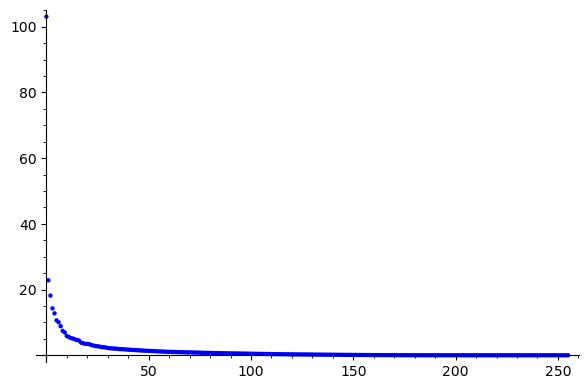

In [69]:
list_plot(D.diagonal())

<p>Con objeto de diferenciar mejor los valores más pequeños, vamos a representar nuevamente los mismos pero prescindiendo de los 10 primeros valores:</p>

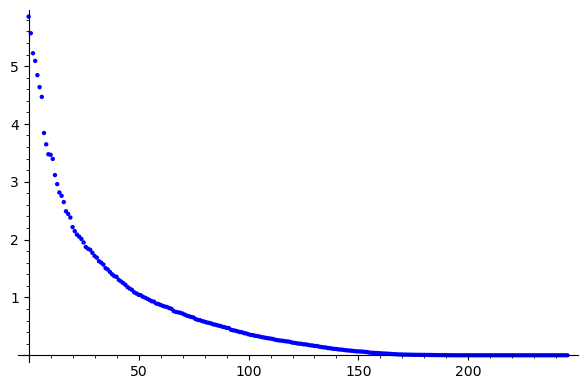

In [70]:
list_plot(D.diagonal()[10:])

<p>Vamos a visualizar $A_{50}$:</p>

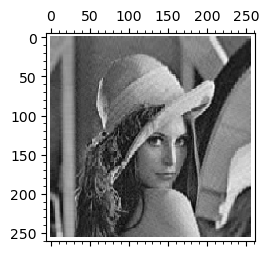

In [71]:
k = 50  ### tan solo hay que modificar el valor asignado a k

Ak = U[:,0:k]*D[0:k,0:k]*(V[:,0:k].transpose())
matrix_plot(Ak, figsize = 4, cmap = 'gray')

<p>Calculamos el factor de compresión:</p>

In [72]:
(k*(m + n + 1)/(m*n)).n()

0.391387939453125

<p>Calculamos la norma de la diferencia entre las matrices que representan las imágenes original y comprimida. Este valor lo llamaremos <strong>nivel de tolerancia de la aproximación</strong> (realmente es el error absoluto entre ambas matrices). Obviamente, mientras más próximo a cero sea el nivel de tolerancia, mayor será la similitud entre ambas imágenes.</p>

In [73]:
(Ak - A).norm(2)  ## nivel de tolerancia de la imagen Ak como aproximación a la imagen A

1.3564892787869303

<p>Repetimos para $A_{20}$:</p>

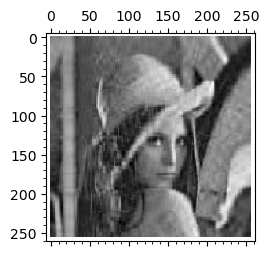

In [74]:
k = 20  ### tan solo hay que modificar el valor asignado a k

Ak = U[:, 0:k]*D[0:k, 0:k]*(V[:, 0:k].transpose())
matrix_plot(Ak, figsize = 4, cmap = 'gray')

In [75]:
(k*(m + n + 1)/(m*n)).n()  ## factor de compresión obtenido con Ak

0.156555175781250

In [76]:
(Ak - A).norm(2)  ## nivel de tolerancia de la imagen Ak como aproximación a la imagen A

3.466302446104441

<div style="color: #000000; background-image: initial; background-attachment: initial; background-origin: initial; background-clip: initial; background-color: #ffffff; background-position: initial initial; background-repeat: initial initial; margin: 8px;">
<p>Obviamente, se obtiene una peor aproximación (mayor error)  tomando 20 valores que si tomamos 50 valores singulares.</p>
<p>El siguiente script permite automatizar el proceso de cálculo de los $A_k$, obtener el factor de compresión y comparar visualmente el resultado con la imagen original:</p>
</div>

In [77]:
nombre_fichero = 'Lena256.png'  ### el nombre del fichero debe ir entre comillas

import pylab 
imagen      = pylab.imread(nombre_fichero)
imagenmedia = pylab.mean(imagen, 2)
A = matrix(imagenmedia)
m = A.nrows(); n = A.ncols()
print('matriz de orden: %s x %s'%(m,n))
U, D, V = A.SVD()

load("codigo_examinar_html.sage") ## para definir show_html

@interact
def compresion_imagen_SVD(k = ("num. valores singulares (calidad)",(20,(1..floor(0.5*min(m,n))))),auto_update=False):
    factor = 100*(k*(m + n + 1)/(m*n)).n()
    show_html("<h2>Imagen comprimida usando %s valores singulares</h2>"%k)
    show_html("    Izquierda: Compresión al %.2f%%. Derecha: original"%factor)
    Ak = U[:, 0:k]*D[0:k, 0:k]*(V[:, 0:k].transpose())
    g = graphics_array([matrix_plot(Ak, cmap='gray'), matrix_plot(A, cmap='gray')])
    g.show(axes = False, figsize = [8, 3])

matriz de orden: 256 x 256


Manual interactive function <function compresion_imagen_SVD at 0x6ffdac3558c0> with 1 widget
  k: SelectionSli…

<p>El script anterior puede utilizarse como una función y llamarse desde cualquier otra celda de cálculo.</p>

<h2>Imagen comprimida usando 50 valores singulares</h2>

Izquierda: Compresión al 39.14%. Derecha: original

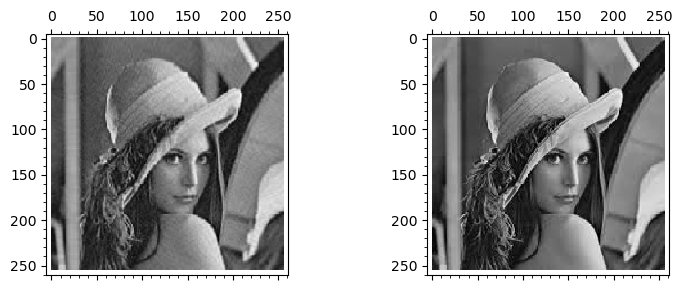

In [78]:
compresion_imagen_SVD(50)

<p>También se puede optar por buscar el menor valor $k$ que se estima razonable para tener una buena compresión visual para un nivel de tolerancia dado, <span style="color: #0000ff;">tol</span>, de la aproximación obtenida, en el sentido de que la diferencia $A-A_k$ tenga norma menor que <span style="color: #0000ff;">tol</span>.</p>
<p>Por ejemplo, tomando <span style="color: #0000ff;">tol</span>=2 en el ejemplo anterior, tendremos:</p>

NIVEL DE TOLERANCIA:  2


<h2>Imagen comprimida usando 35 valores singulares</h2>

Izquierda: Compresión al 27.40%. Derecha: original

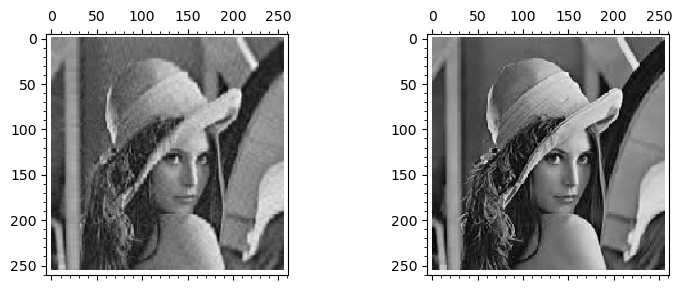

In [79]:
tol = 2  ## basta modificar tan solo el nivel de tolerancia elegido

### no modificar este código
k = 0
norma = tol + 1
while norma > tol:
    k = k+1
    Ak    = U[:,0:k]*D[0:k,0:k]*(V[:,0:k].transpose())
    norma = (A - Ak).norm(2)
print('NIVEL DE TOLERANCIA: ', tol)
compresion_imagen_SVD(k)

In [80]:
print((A - Ak).norm(2))
(A - Ak).norm(2) < tol

1.9507802009668014


True

<hr>

<h3><a name="cuestionario"></a></h3>
<h3>CUESTIONARIO PARA EL ALUMNADO</h3>

Introduzca en la variable NUMERO_CUESTIONARIO, que aparece más abajo, el número correspondiente a su cuestionario asignado y ejecuta la celda (*Shift* + *Enter* desde dentro de la celda). Accederá a un cuestionario con respuestas tipo test que se entregará cumplimentado antes de finalizar esta sesión práctica, siguiendo un modelo impreso que entregará el profesor y/o on-line en la plataforma de enseñanza virtual (seguir las instrucciones dadas en la clase de laboratorio por el docente).

**Ayuda para copiar los datos de los enunciados:**

* Se puede utilizar la función `matrix_from_copypaste` para copiar y pegar los coeficientes de las matrices. Selecciona con el ratón todos los datos del interior de la matriz y cópialos con Ctrl+C. Luego, pégalos (entre comillas) con Ctrl+V en el interior de la siguiente orden:
      A = matrix_from_copypaste(RDF, 5, 5, 'pegar_aqui_los_coeficientes' )   # matriz de orden 5x5 para datos en RDF.
* De forma análoga, se puede utilizar la función `vector_from_copypaste` para copiar y pegar los coeficientes de los vectores.
      b = vector_from_copypaste(RDF, 'pegar_aqui_los_coeficientes' )    # vector para datos en RDF.

_Observaciones:_
* Aunque los enunciados contienen instrucciones para copiar y pegar los datos, es más cómodo usar la función `matrix_from_copypaste`.
* Utilizar el formato `RDF` (*Real Double Field*) para almacenar los números en coma flotante.
* Prestar especial atención a la tolerancia numérica proporcionada en los enunciados a la hora de elegir una respuesta tipo test.

In [2]:
NUMERO_CUESTIONARIO = 155 # Cambiar al número de cuestionario proporcionado por el profesorado.


####  NO MODIFICAR EL CÓDIGO DE ABAJO:  ########################

NOMBRE_FICHERO_EXAMEN = 'ALN_L5_t.htl'

load('show_html.sage')
load('codigo_examinar_html.sage')

if NUMERO_CUESTIONARIO > 0:
    lector_examenes(NOMBRE_FICHERO_EXAMEN, NUMERO_CUESTIONARIO, False)

1. 6,2. 9
3. 7,4. Ninguna de las otras respuestas.


In [0]:
# EJERCICIO 1
'''
Marcar la respuesta correcta, para una precisión numérica de al menos 6 cifras decimales exactas. Ayuda: puede copiar
y pegar los datos de la matriz desde el enunciado hasta instrucciones del tipo: 
A=matrix(RDF,5,5,[pegar_datos_aqui]).transpose() b=vector(RDF,[pegar_datos_aqui]) es importante borrar y
reescribir todos los signos negativos.
'''

In [ ]:
# EJERCICIO 1 - APARTADO 1
'''
Guardar los datos de la matriz  A  y el vector  b  empleando el anillo de números RDF. Encontrar la solución del sistema  
Ax=b  mediante la factorización PLU.
'''

In [34]:
# Sustituir TODOS los símbolos negativos a mano!!
A = matrix_from_copypaste(RDF,5,5,'-2,-9,585,-1,-1,2,-1,-1,-2,0,1,-10,1,0,-1,-1,0,0,-70,1,0,0,15,0,0')
b = vector_from_copypaste(RDF,'4,54,-87,-152,8')

show(A)
show(b)

# Solucion por PLU
P, L, U = descompPLU(A)
bp = P * b

g = modifica_lado_derecho(L,bp)
xplu = sustitucion_regresiva2(U,g)

print("Solución: ")
show(xplu)

[ -2.0   2.0   1.0  -1.0   0.0]
[ -9.0  -1.0 -10.0   0.0   0.0]
[585.0  -1.0   1.0   0.0  15.0]
[ -1.0  -2.0   0.0 -70.0   0.0]
[ -1.0   0.0  -1.0   1.0   0.0]

(4.0, 54.0, -87.0, -152.0, 8.0)

Solución: 


(-5.213075934841624e-14, 5.999999999999911, -5.999999999999944, 2.000000000000003, -4.999999999997977)

In [ ]:
'''
1. (-7.00000000000001, 4.758983904625787e-14, -3.9999999999968345, 4.999999999999963, 7.999999999999972)
2. (-5.213075934841624e-14, 5.999999999999911, -5.999999999999944, 2.000000000000003, -4.999999999997977)
3. (1.6342482922482304e-12, 4.999999999998964, -7.000000000000097, -2.00000000000008, -8.999999999999941)
4. (-6.000000000001364, 3.590110664893138e-13, -4.000000000000868, -6.999999999999995, -7.000000000000019)
'''

In [ ]:
# EJERCICIO 1 - APARTADO 2
'''
Calcular la proporción  κ(L)∗κ(U)/κ(A)  entre el producto de los números de condición de  L  y  U  y el número de condición
de  A , todos calculados para la norma euclídea.
'''

In [35]:
# Nº condición A
nqA, nqU, nqL = numero_condicion(A), numero_condicion(U), numero_condicion(L)

print("Solución: ")
show((nqL * nqU) / nqA)

Solución: 


2.8389864664701556

In [ ]:
'''
1. 2.3325193945
2. 2.83898646647
3. 3.21524858475
4. 2.17882053344
'''

In [ ]:
# EJERCICIO 1 - APARTADO 3
'''
Encontrar la solución del sistema  Ax=b  mediante la factorización QR.
'''

In [36]:
Q, R = factorizacion_QR(A)
bq = Q.transpose() * b

print("Solución: ")
show(sustitucion_regresiva2(R,bq))

Solución: 


(1.0419608812368166e-08, 6.000000015592706, -6.000000010937711, 1.9999999994056588, -5.000000404596047)

In [ ]:
'''
1. (-2.3963455228268767e-09, 4.999999927308334, 9.000000069477226, -7.999999999994634, 7.968470869769445e-10)
2. (1.9999999994974005, -4.647439837023477e-09, 3.0000000016221926, -1.999999999934732, 5.999999999637521)
3. (-1.0331888849284521e-08, 5.999999984538575, -5.999999989154374, 2.0000000005893375, -4.999999598810137)
4. (-7.787093636579812e-09, 7.770330310842088e-09, 3.000000000005956, -1.000000000002472, 8.999999999991772)
'''

In [ ]:
# EJERCICIO 2 
'''
Marcar la respuesta correcta, para una precisión numérica de al menos 6 cifras decimales exactas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 1
'''
Guardar los datos de la matriz  B  y el vector  c  empleando el anillo de números RDF. Encontrar la solución del 
sistema  Bx=c  mediante la factorización PLU.
'''

In [18]:
# Sustituir TODOS los símbolos negativos a mano!!
B = matrix_from_copypaste(RDF,5,5,'-3,-5,-5,0,1,1,-6,-1,-1,7,1,1,1,0,-1,1,-1,-2,0,-1,-1,1,-2,2,-1')
b = vector_from_copypaste(RDF,'-9,5,-8,4,-11')

show(B)
show(b)

# Solucion por PLU
P, L, U = descompPLU(B)
bp = P * b

g = modifica_lado_derecho(L,bp)
xplu = sustitucion_regresiva2(U,g)

print("Solución: ")
show(xplu)

[-3.0  1.0  1.0  1.0 -1.0]
[-5.0 -6.0  1.0 -1.0  1.0]
[-5.0 -1.0  1.0 -2.0 -2.0]
[ 0.0 -1.0  0.0  0.0  2.0]
[ 1.0  7.0 -1.0 -1.0 -1.0]

(-9.0, 5.0, -8.0, 4.0, -11.0)

Solución: 


(1.0000000000000004, -2.0, -2.999999999999999, -1.7763568394002506e-16, 0.9999999999999999)

In [ ]:
'''
1. (-1.0, 4.000000000000001, -5.0, -0.0, -4.0)
2. (1.0, 6.0, 8.511954451851829e-18, 4.620185482831054e-18, -6.999999999999999)
3. (1.0000000000000004, -2.0, -2.999999999999999, -1.7763568394002506e-16, 0.9999999999999999)
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 2
'''
Calcular la proporción  κ(L)∗κ(U)/κ(B)  entre el producto de los números de condición de  L  y  U  y el número de 
condición de  B , todos calculados para la norma euclídea.
'''

In [19]:
# Nº condición B
nqB, nqU, nqL = numero_condicion(B), numero_condicion(U), numero_condicion(L)

print("Solución: ")
show((nqL * nqU) / nqB)

Solución: 


2.470209849372729

In [ ]:
'''
1. 2.83976934048
2. 2.77718964894
3. 2.47020984937
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 3
'''
Encontrar la solución del sistema  Bx=c  mediante la factorización QR.
'''

In [20]:
Q, R = factorizacion_QR(B)
bq = Q.transpose() * b

print("Solución: ")
# ESTE SALE MAL, A VECES CAMBIA UN NÚMERO! OJO!
show(sustitucion_regresiva2(R,bq))

Solución: 


(0.999999999999975, -2.0000000000000075, -3.0000000000001097, 3.19620129465426e-14, 0.9999999999999876)

In [ ]:
'''
1. (-8.000000000000107, -6.999999999999994, -7.000000000000002, 5.591130227929411e-14, -6.999999999999992)
2. (0.9999999999999832, -2.000000000000007, -3.000000000000081, 2.3877503789476002e-14, 0.999999999999986)
3. (5.000000000000005, -3.999999999999998, -8.000000000000012, 2.2304679703432183e-14, 3.999999999999999)
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 4
'''
Bajo el supuesto de que los sistemas  Ax=b  del ejercicio anterior y  Bx=c  de este ejercicio son dos modelizaciones 
diferentes del mismo problema, ¿qué vector sería más fiable tomar como aproximación a la solución del problema?
'''

In [28]:
# Probar todos los vectores de solución:
x0 = vector(QQ,[0.0, 7.0, -8.0, -8.0, 6.0])

b = B*x0
xd = B.solve_right(b)

# A es la matriz del ejercicio 1, B es la del ejercicio 2:
B = B.change_ring(RDF)
b = vector(RDF,list(b))

# LA SOLUCIÓN SERÁ EL VECTOR b QUE DEVUELVA UN VALOR MÁS PEQUEÑO
show((B * xd - b).norm())

1.0087767680389479e-14

In [ ]:
'''
1. (0.0, 7.0, -8.0, -8.0, 6.0) ---> 1.652011860642233×10−13 / 1.0087767680389479×10−14
2. (1.0, -2.0, -3.0, 0.0, 1.0) ---> 1.9860273225978185×10−15 / 2.5121479338940403×10−15
3. (4.0, 0.0, 6.0, 0.0, 0.0) ---> 2.220446049250313×10−16 / 8.043656360639581×10−15
4. (-5.0, 0.0, 5.0, 0.0, -9.0) ---> 3.5743769024280224×10−15 / 2.220446049250313×10−16
'''

In [ ]:
# EJERCICIO 3 
'''
Dada la matriz A, guardarla en memoria declarando sus coeficientes en el anillo RDF.
'''

In [ ]:
# EJERCICIO 3 - APARTADO 1
'''
Comprobar mediante escalonamiento que el rango es 10. Señalar cuál es su rango numérico estimado a partir de la 
descomposición SVD de la matriz, para un nivel de tolerancia por defecto de  10−14 .
'''

In [29]:
# Sustituir TODOS los símbolos negativos a mano!!
C = matrix_from_copypaste(RDF,10,10,'46,-115,41,-4,-9,0,1,1,-3,-3,-388,176,40,3,2,52,1,-2,0,1,866,-364,-106,-2,0,-124,-1,1,0,1,-17,-106,67,0,-8,3,9,0,-1,-1,27,136,-100,-9,1,0,-15,-1,7,1,-27,58,-55,0,0,1,-1,-4,5,1,279,499,-662,-2,-1,3,-99,2,0,1,-98,63,135,-1,-1,-4,3,0,1,15,-20,19,25,2,1,-2,0,0,-1,4,-1,36,-21,0,2,2,-5,1,-1,0')

show(C)

# Escalonamiento: cambiar el valor de la tolerancia por el dado:
UU = C.echelon_form()
show(UU.zero_at(10^-14))

# Deben coincidir: depende del tamaño de la matriz:
show([UU[i,i] for i in range(10)])
show(C.rank())

print("Solución: ")
U, D, V = C.SVD()
show(rango_SVD(C))

[  46.0 -388.0  866.0  -17.0   27.0  -27.0  279.0  -98.0  -20.0   -1.0]
[-115.0  176.0 -364.0 -106.0  136.0   58.0  499.0   63.0   19.0   36.0]
[  41.0   40.0 -106.0   67.0 -100.0  -55.0 -662.0  135.0   25.0  -21.0]
[  -4.0    3.0   -2.0    0.0   -9.0    0.0   -2.0   -1.0    2.0    0.0]
[  -9.0    2.0    0.0   -8.0    1.0    0.0   -1.0   -1.0    1.0    2.0]
[   0.0   52.0 -124.0    3.0    0.0    1.0    3.0   -4.0   -2.0    2.0]
[   1.0    1.0   -1.0    9.0  -15.0   -1.0  -99.0    3.0    0.0   -5.0]
[   1.0   -2.0    1.0    0.0   -1.0   -4.0    2.0    0.0    0.0    1.0]
[  -3.0    0.0    0.0   -1.0    7.0    5.0    0.0    1.0   -1.0   -1.0]
[  -3.0    1.0    1.0   -1.0    1.0    1.0    1.0   15.0    4.0    0.0]

[               1.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                1.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0 0.9999999999999999                0.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0]
[               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0]

[1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

10

Solución: 


8

In [ ]:
'''
1. 6	2. 9
3. 7	4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 4
'''
Para este ejercicio se debe utilizar la imagen en blanco y negro de 256x256 pixeles denominada imagen3.png.
'''

In [ ]:
# EJERCICIO 4 - APARTADO 1
'''
Para una tolerancia dada de 2.5, determinar el número k mínimo de valores singulares que proporciona una compresión
visual con dicho nivel de tolerancia, utilizando descomposición SVD.
'''

matriz de orden: 256 x 256


Manual interactive function <function compresion_imagen_SVD at 0x6ffdab3ad3b0> with 1 widget
  k: SelectionSli…

NIVEL DE TOLERANCIA:  2.50000000000000


<h2>Imagen comprimida usando 28 valores singulares</h2>

Izquierda: Compresión al 21.92%. Derecha: original

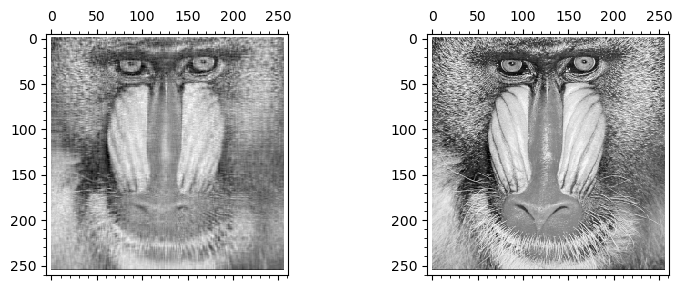

In [33]:
# Cambiar la imagen por la requerida y la tolerancia por la dada!
nombre_fichero = 'imagen3.png' 
tol = 2.5

###################################################################################################################
import pylab 
imagen      = pylab.imread(nombre_fichero)
imagenmedia = pylab.mean(imagen, 2)
A = matrix(imagenmedia)
m = A.nrows(); n = A.ncols()
print('matriz de orden: %s x %s'%(m,n))
U, D, V = A.SVD()

#load("codigo_examinar_html.sage") ## para definir show_html
###################################################################################################################
@interact
def compresion_imagen_SVD(k = ("num. valores singulares (calidad)",(20,(1..floor(0.5*min(m,n))))),auto_update=False):
    factor = 100*(k*(m + n + 1)/(m*n)).n()
    show_html("<h2>Imagen comprimida usando %s valores singulares</h2>"%k)
    show_html("    Izquierda: Compresión al %.2f%%. Derecha: original"%factor)
    Ak = U[:, 0:k]*D[0:k, 0:k]*(V[:, 0:k].transpose())
    g = graphics_array([matrix_plot(Ak, cmap='gray'), matrix_plot(A, cmap='gray')])
    g.show(axes = False, figsize = [8, 3])
###################################################################################################################

### no modificar este código
k = 0
norma = tol + 1
while norma > tol:
    k = k+1
    Ak    = U[:,0:k]*D[0:k,0:k]*(V[:,0:k].transpose())
    norma = (A - Ak).norm(2)
print('NIVEL DE TOLERANCIA: ', tol)
compresion_imagen_SVD(k)
###################################################################################################################

# La solución vendrá dada por el nº de valores singulares, pero el segundo! no el primero. 

In [ ]:
'''
1. 27
2. 8
3. 28
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 4 - APARTADO 2
'''
Determinar el valor k mínimo para obtener un factor de compresión de al menos el 53 por ciento.
'''

In [31]:
# Se trata del mismo código pero ahora hay que jugar con la barra de desplazamiento de pylab, colocarla en el valor dado!

###################################################################################################################
import pylab 
imagen      = pylab.imread(nombre_fichero)
imagenmedia = pylab.mean(imagen, 2)
A = matrix(imagenmedia)
m = A.nrows(); n = A.ncols()
print('matriz de orden: %s x %s'%(m,n))
U, D, V = A.SVD()

#load("codigo_examinar_html.sage") ## para definir show_html

@interact
def compresion_imagen_SVD(k = ("num. valores singulares (calidad)",(20,(1..floor(0.5*min(m,n))))),auto_update=False):
    factor = 100*(k*(m + n + 1)/(m*n)).n()
    show_html("<h2>Imagen comprimida usando %s valores singulares</h2>"%k)
    show_html("    Izquierda: Compresión al %.2f%%. Derecha: original"%factor)
    Ak = U[:, 0:k]*D[0:k, 0:k]*(V[:, 0:k].transpose())
    g = graphics_array([matrix_plot(Ak, cmap='gray'), matrix_plot(A, cmap='gray')])
    g.show(axes = False, figsize = [8, 3])
###################################################################################################################

matriz de orden: 256 x 256


Manual interactive function <function compresion_imagen_SVD at 0x6ffdabc474d0> with 1 widget
  k: SelectionSli…

In [ ]:
'''
1. 64
2. 68
3. 76
4. Ninguna de las otras respuestas.
'''

In [ ]:
# FIN